In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import pickle as pkl

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [3]:
df=pd.read_csv("Final_Dataset.csv")
df=shuffle(df).reset_index(drop=True)
df

,Unnamed: 0,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,145558,2022/08/21 22:00,1148,800E39DD0,519,800E3AE80,2692.88,Euro,2692.88,Euro,ACH,1
1,38655,2022/08/01 00:15,28920,804B0DC60,28920,804B0DC60,11430722.09,US Dollar,11430722.09,US Dollar,Reinvestment,0
2,19940,2022/08/01 00:14,23294,8027FB6E0,23294,8027FB6E0,4.34,US Dollar,4.34,US Dollar,Reinvestment,0
3,47653,2022/08/01 00:02,19700,8059E9890,19700,8059E9890,268332.58,US Dollar,268332.58,US Dollar,Reinvestment,0
4,103777,2022/08/07 15:11,1601,803669F20,155152,814C01FE0,1411210.98,Yen,1411210.98,Yen,ACH,1
...,...,...,...,...,...,...,...,...,...,...,...,...
157617,112395,2022/09/07 15:23,0,800117F00,20,800119E40,13207.77,US Dollar,13207.77,US Dollar,ACH,1
157618,91451,2022/08/01 00:01,226661,80CFB6730,12773,83C7C3E50,33.92,US Dollar,33.92,US Dollar,Credit Card,0
157619,110721,2022/08/05 21:04,70,100428660,131380,83A6A5240,31247.40,US Dollar,31247.40,US Dollar,Cheque,1
157620,94322,2022/08/01 00:09,211124,80D9E2480,211124,80D9E2480,23.36,US Dollar,23.36,US Dollar,Reinvestment,0


In [4]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'From Bank', 'Account', 'To Bank',
       'Account.1', 'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/08/21 22:00,1148,800E39DD0,519,800E3AE80,2692.88,Euro,2692.88,Euro,ACH,1
1,2022/08/01 00:15,28920,804B0DC60,28920,804B0DC60,11430722.09,US Dollar,11430722.09,US Dollar,Reinvestment,0
2,2022/08/01 00:14,23294,8027FB6E0,23294,8027FB6E0,4.34,US Dollar,4.34,US Dollar,Reinvestment,0
3,2022/08/01 00:02,19700,8059E9890,19700,8059E9890,268332.58,US Dollar,268332.58,US Dollar,Reinvestment,0
4,2022/08/07 15:11,1601,803669F20,155152,814C01FE0,1411210.98,Yen,1411210.98,Yen,ACH,1


In [7]:
df.describe()

,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,1.576220e+05,1.576220e+05,1.576220e+05,1.576220e+05,157622.000000
mean,9.152345e+04,1.179635e+05,2.144722e+07,2.144644e+07,0.365590
std,2.486239e+05,3.021413e+05,2.202855e+09,2.202855e+09,0.481597
min,0.000000e+00,0.000000e+00,8.100000e-05,8.100000e-05,0.000000
25%,2.670000e+03,5.889000e+03,2.377200e+02,2.377200e+02,0.000000
50%,1.770000e+04,2.225400e+04,4.963665e+03,4.962805e+03,0.000000
75%,1.136200e+05,1.244140e+05,2.112702e+04,2.112702e+04,1.000000
max,3.146880e+06,2.223559e+06,6.759616e+11,6.759616e+11,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           157622 non-null  object 
 1   From Bank           157622 non-null  int64  
 2   Account             157622 non-null  object 
 3   To Bank             157622 non-null  int64  
 4   Account.1           157622 non-null  object 
 5   Amount Received     157622 non-null  float64
 6   Receiving Currency  157622 non-null  object 
 7   Amount Paid         157622 non-null  float64
 8   Payment Currency    157622 non-null  object 
 9   Payment Format      157622 non-null  object 
 10  Is Laundering       157622 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 13.2+ MB


In [9]:
#Check Missing Value

df.isnull().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [10]:
## There are no any null values

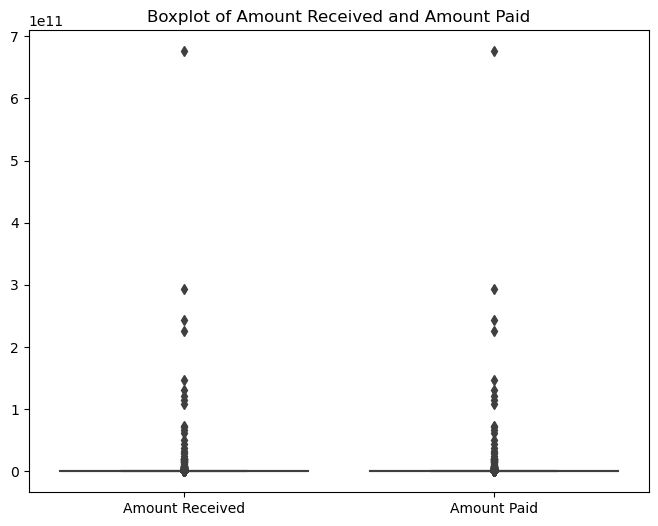

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Amount Received', 'Amount Paid']])
plt.title('Boxplot of Amount Received and Amount Paid')
plt.show()


In [12]:
# Find out records which are outliers
mean = df['Amount Received'].mean()
std = df['Amount Received'].std()

Tmax = mean + (3*std)
Tmin = mean - (3*std)

outliers = df[(df['Amount Received']<Tmin)|(df['Amount Received']>Tmax)]['Amount Received'].values
outliers

array([2.25387209e+11, 2.86331831e+10, 3.75100076e+10, 1.21622639e+11,
       1.64803850e+10, 7.93900458e+09, 4.38234061e+10, 1.46591751e+11,
       6.75961604e+11, 3.31445671e+10, 6.64426497e+09, 1.49241228e+10,
       1.79171777e+10, 2.92897553e+11, 8.41429155e+09, 1.79229410e+10,
       7.17401506e+09, 1.60987422e+10, 2.95988890e+10, 1.11268094e+10,
       7.05811815e+09, 1.30051514e+11, 7.69803230e+09, 7.30597029e+10,
       2.00563118e+10, 7.18714109e+10, 6.88899462e+09, 6.69439520e+10,
       1.08150963e+11, 1.42127118e+10, 1.95491079e+10, 1.72983587e+10,
       1.14681755e+11, 1.38513550e+10, 8.44473454e+09, 2.43018696e+11,
       1.99225033e+10, 1.95446343e+10, 5.07450890e+10, 6.87801589e+09,
       2.19763435e+10, 9.74348109e+09, 6.15553603e+10, 2.04314907e+10,
       2.47117868e+10])

In [13]:
len(outliers)

45

In [14]:
df.to_csv('final_shuffle_dataset.csv', index=False)

In [15]:
# Once we have identified which data points are outliers, the next step is to determine how to treat these outliers (ignore/remove/manipulate). We intentionally avoid immediately removing outlier values because we suspect that money launderers may receive unusual or extremely deviant amounts of money from originating transaction accounts.

#To determine a reasonable course of action for outliers in this money laundering case, we need to examine how many outlier data points are identified as money laundering and how many are not identified as money laundering.

In [16]:
outliers_df = df[(df['Amount Received']<Tmin) | (df['Amount Received']>Tmax)]
outliers_df['Is Laundering'].value_counts()

Is Laundering
1    45
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           157622 non-null  object 
 1   From Bank           157622 non-null  int64  
 2   Account             157622 non-null  object 
 3   To Bank             157622 non-null  int64  
 4   Account.1           157622 non-null  object 
 5   Amount Received     157622 non-null  float64
 6   Receiving Currency  157622 non-null  object 
 7   Amount Paid         157622 non-null  float64
 8   Payment Currency    157622 non-null  object 
 9   Payment Format      157622 non-null  object 
 10  Is Laundering       157622 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 13.2+ MB


In [18]:
# As we all know, Machine Learning can only process numerical data. Therefore, it's important for us to carefully select the features available. When there are features that cannot be processed, we can manipulate them to produce meaningful values.

#Based on the information provided above, there are several columns that are not of numerical data type:

#*) Timestamp

#*) Account

#*) Account.1

#*) Receiving Currency

#*) Payment Currency

#*) Payment Format

In [19]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Hour'] = df['Timestamp'].dt.hour
df['Minutes'] = df['Timestamp'].dt.minute

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Timestamp           157622 non-null  datetime64[ns]
 1   From Bank           157622 non-null  int64         
 2   Account             157622 non-null  object        
 3   To Bank             157622 non-null  int64         
 4   Account.1           157622 non-null  object        
 5   Amount Received     157622 non-null  float64       
 6   Receiving Currency  157622 non-null  object        
 7   Amount Paid         157622 non-null  float64       
 8   Payment Currency    157622 non-null  object        
 9   Payment Format      157622 non-null  object        
 10  Is Laundering       157622 non-null  int64         
 11  Hour                157622 non-null  int32         
 12  Minutes             157622 non-null  int32         
dtypes: datetime64[ns](1), float64

In [21]:
#We move on to the 'Account' and 'Account.1' features, which are the codes for the starting and ending accounts of a transaction. We want to see if transactions between the same account affect whether it's flagged as money laundering.

#So, we add a new column called 'Different Account'. It gets a 0 if the transaction is between the same sender and receiver accounts, and a 1 if it's between different accounts. After adding this column, we can drop the 'Account' and 'Account.1' columns since we don't need them anymore.


In [22]:
df['Different Account'] = np.where(df['Account'] == df['Account.1'], 0, 1)

In [23]:
df['Different Account'].value_counts()

Different Account
1    83658
0    73964
Name: count, dtype: int64

In [24]:
count_1_0 = df[(df['Different Account'] == 1) & (df['Is Laundering'] == 0)]['Is Laundering'].count()
count_0_1 = df[(df['Different Account'] == 0) & (df['Is Laundering'] == 1)]['Is Laundering'].count()
count_1_1 = df[(df['Different Account'] == 1) & (df['Is Laundering'] == 1)]['Is Laundering'].count()
count_0_0 = df[(df['Different Account'] == 0) & (df['Is Laundering'] == 0)]['Is Laundering'].count()

# Menampilkan hasil
print("Amount (Different Account=1, Is Laundering=0):", count_1_0)
print("Amount (Different Account=0, Is Laundering=1):", count_0_1)
print("Amount (Different Account=1, Is Laundering=1):", count_1_1)
print("Amount (Different Account=0, Is Laundering=0):", count_0_0)

Amount (Different Account=1, Is Laundering=0): 26155
Amount (Different Account=0, Is Laundering=1): 122
Amount (Different Account=1, Is Laundering=1): 57503
Amount (Different Account=0, Is Laundering=0): 73842


In [25]:
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix = confusion_matrix(df['Is Laundering'], df['Different Account'])
conf_matrix

array([[73842, 26155],
       [  122, 57503]], dtype=int64)

In [26]:
#Initially, we assumed that a transaction occurring between the same accounts would be unusual. However, after conducting calculations, we found that the influence of transactions between the same accounts on the identification as a money laundering transaction is not strong enough. This conclusion is based on the confusion matrix, which evaluates the impact of the 'Different Account' column on the 'Is Laundering' column and shows relatively balanced values. There are only 122 data points where a transaction occurs between the same accounts and is identified as money laundering. This number is relatively small compared to others.

In [27]:
#Drop unrelatable columns
df = df.drop(columns=['Account','Account.1'])

In [28]:
df.head()

,Timestamp,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour,Minutes,Different Account
0,2022-08-21 22:00:00,1148,519,2692.88,Euro,2692.88,Euro,ACH,1,22,0,1
1,2022-08-01 00:15:00,28920,28920,11430722.09,US Dollar,11430722.09,US Dollar,Reinvestment,0,0,15,0
2,2022-08-01 00:14:00,23294,23294,4.34,US Dollar,4.34,US Dollar,Reinvestment,0,0,14,0
3,2022-08-01 00:02:00,19700,19700,268332.58,US Dollar,268332.58,US Dollar,Reinvestment,0,0,2,0
4,2022-08-07 15:11:00,1601,155152,1411210.98,Yen,1411210.98,Yen,ACH,1,15,11,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Timestamp           157622 non-null  datetime64[ns]
 1   From Bank           157622 non-null  int64         
 2   To Bank             157622 non-null  int64         
 3   Amount Received     157622 non-null  float64       
 4   Receiving Currency  157622 non-null  object        
 5   Amount Paid         157622 non-null  float64       
 6   Payment Currency    157622 non-null  object        
 7   Payment Format      157622 non-null  object        
 8   Is Laundering       157622 non-null  int64         
 9   Hour                157622 non-null  int32         
 10  Minutes             157622 non-null  int32         
 11  Different Account   157622 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(3)
memory usage: 12.6+ MB

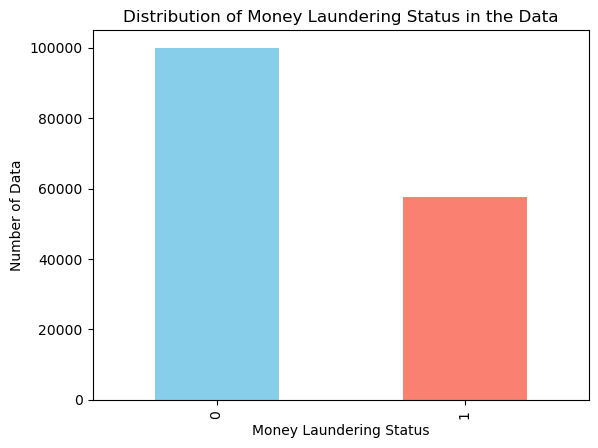

In [30]:
#python
# Creating a bar plot
df['Is Laundering'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Adding labels and title
plt.xlabel('Money Laundering Status')
plt.ylabel('Number of Data')
plt.title('Distribution of Money Laundering Status in the Data')

# Displaying the bar plot
plt.show()

In [31]:
[]#Insight: The visualization above provides an overview of the comparison between data identified as money laundering and those not identified as money laundering. Interestingly, the DataFrame 'df' contains more data not identified as money laundering compared to those identified as money laundering.

[]

<Axes: ylabel='Payment Format'>

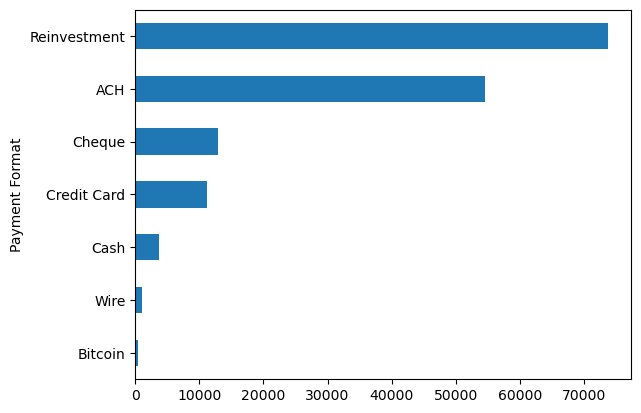

In [32]:
df['Payment Format'].value_counts().sort_values().plot(kind='barh')

In [33]:
#we can clearly see the proportion of data in terms of the percentage of data based on the payment formats available. From the pie chart visualization, it is evident that there are two payment formats most commonly used for transactions. Reinvestment constitutes the largest proportion at 46.7%, followed by ACH at 34.6%.

#Reinvestment refers to the act of reinvesting funds received from previous investments. This can occur in various contexts, such as dividends earned from stock investments being reinvested to purchase more stocks.

#ACH is an electronic payment system used to process electronic fund transfers between bank accounts in the United States.

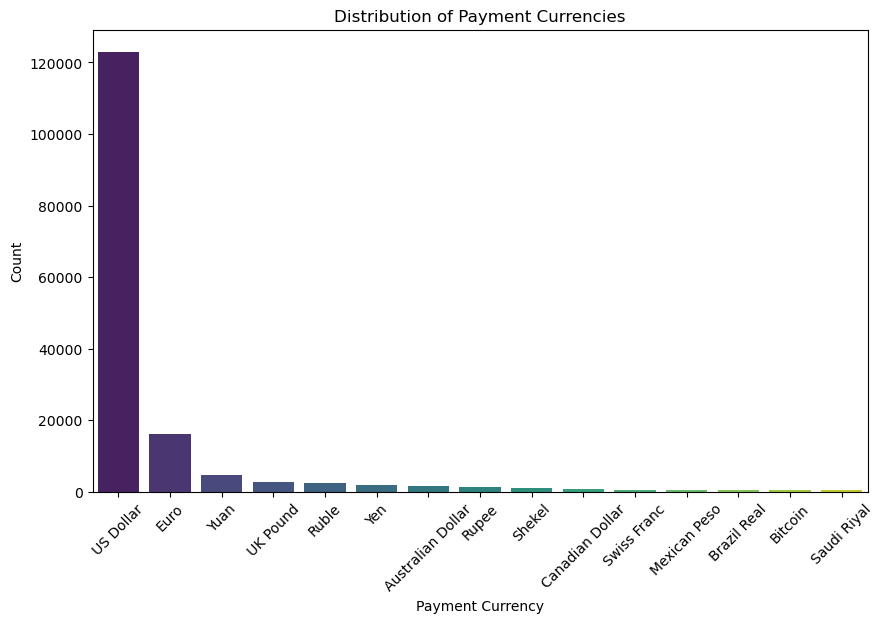

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the count plot with different colors for each bar
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Currency', data=df, order=df['Payment Currency'].value_counts().index, palette='viridis')
plt.xlabel('Payment Currency')
plt.ylabel('Count')
plt.title('Distribution of Payment Currencies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


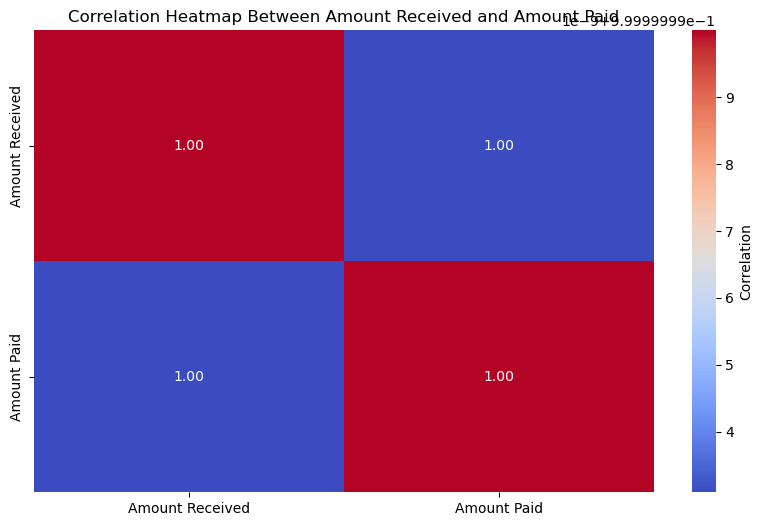

In [35]:
# Selecting numeric columns for correlation heatmap
numeric_columns = df[['Amount Received', 'Amount Paid']]

# Creating correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})

# Adding title
plt.title('Correlation Heatmap Between Amount Received and Amount Paid')

# Displaying the heatmap
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


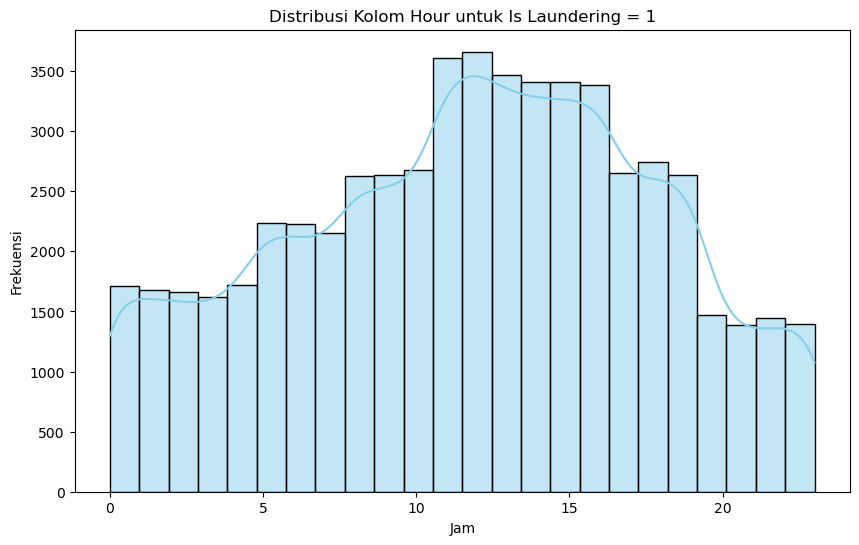

In [36]:
# Filter DataFrame hanya untuk 'Is Laundering' yang memiliki nilai 1
df_is_laundering_1 = df[df['Is Laundering'] == 1]

# Pembuatan Histogra,
plt.figure(figsize=(10, 6))
sns.histplot(data=df_is_laundering_1, x='Hour', bins=24, kde=True, color='skyblue')
plt.title('Distribusi Kolom Hour untuk Is Laundering = 1')
plt.xlabel('Jam')
plt.ylabel('Frekuensi')
plt.show()

In [37]:
#Insight: Money launderers tend to conduct most of their transactions during the daytime, particularly between 11:00 AM and 3:00 PM.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Timestamp           157622 non-null  datetime64[ns]
 1   From Bank           157622 non-null  int64         
 2   To Bank             157622 non-null  int64         
 3   Amount Received     157622 non-null  float64       
 4   Receiving Currency  157622 non-null  object        
 5   Amount Paid         157622 non-null  float64       
 6   Payment Currency    157622 non-null  object        
 7   Payment Format      157622 non-null  object        
 8   Is Laundering       157622 non-null  int64         
 9   Hour                157622 non-null  int32         
 10  Minutes             157622 non-null  int32         
 11  Different Account   157622 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(3)
memory usage: 12.6+ MB

In [39]:
df.nunique()

Timestamp              38928
From Bank               9097
To Bank                 9829
Amount Received       123447
Receiving Currency        15
Amount Paid           123609
Payment Currency          15
Payment Format             7
Is Laundering              2
Hour                      24
Minutes                   60
Different Account          2
dtype: int64

#Insight:
- The 'Payment Currency' and 'Receiving Currency' columns each have 15 unique values.
- The 'Payment Format' column has 7 unique values.

Feature Engineering¶
Our goal in examining the categorical data variations above is to determine the appropriate Feature Engineering method for each categorical column. As we all know, Machine Learning can only process numeric data, so categorical data must be converted to numeric data through Feature Engineering. Feature Engineering includes several methods such as:

*) Binary Encoding (to convert categorical data that only has 2 unique values)

*) One Hot Encoding (to convert categorical data that has more than 2 unique values)

*) Label Encoding (to convert categorical data into labels that we define ourselves)

*) Frequency Encoding (to convert categorical data into numeric based on the frequency of each value)

*) Mean Encoding (to convert categorical data into numeric based on mean)

NOTES: It is very important for us to wisely choose the most suitable method for a categorical column.

In [40]:
#Before Feature Engineering
df.head()

,Timestamp,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour,Minutes,Different Account
0,2022-08-21 22:00:00,1148,519,2692.88,Euro,2692.88,Euro,ACH,1,22,0,1
1,2022-08-01 00:15:00,28920,28920,11430722.09,US Dollar,11430722.09,US Dollar,Reinvestment,0,0,15,0
2,2022-08-01 00:14:00,23294,23294,4.34,US Dollar,4.34,US Dollar,Reinvestment,0,0,14,0
3,2022-08-01 00:02:00,19700,19700,268332.58,US Dollar,268332.58,US Dollar,Reinvestment,0,0,2,0
4,2022-08-07 15:11:00,1601,155152,1411210.98,Yen,1411210.98,Yen,ACH,1,15,11,1


For the 'Payment Currency' and 'Receiving Currency' columns, we agree to use frequency encoding. The reason is that the data variations are quite extensive (there are 15 unique values), making binary encoding impractical, and using one-hot encoding would be overly burdensome. Additionally, we chose frequency encoding because we want to replace a value with how often that value appears compared to other unique values.

In [41]:
#Create a Frequency Encoding Function
def frequency_encoding(data, features):
    freq_encoding = data.groupby(features).size() / len(data)
    return freq_encoding


In [42]:
df['Payment Currency'] = df['Payment Currency'].map(frequency_encoding(df,df['Payment Currency']))

In [43]:
df['Receiving Currency'] = df['Receiving Currency'].map(frequency_encoding(df,df['Receiving Currency']))

In [44]:

#One hot encoding For Payment Format
df = pd.get_dummies(df,columns=['Payment Format'])

In [45]:
df.head()

,Timestamp,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Is Laundering,Hour,Minutes,Different Account,Payment Format_ACH,Payment Format_Bitcoin,Payment Format_Cash,Payment Format_Cheque,Payment Format_Credit Card,Payment Format_Reinvestment,Payment Format_Wire
0,2022-08-21 22:00:00,1148,519,2692.88,0.102200,2692.88,0.102904,1,22,0,1,True,False,False,False,False,False,False
1,2022-08-01 00:15:00,28920,28920,11430722.09,0.781078,11430722.09,0.780342,0,0,15,0,False,False,False,False,False,True,False
2,2022-08-01 00:14:00,23294,23294,4.34,0.781078,4.34,0.780342,0,0,14,0,False,False,False,False,False,True,False
3,2022-08-01 00:02:00,19700,19700,268332.58,0.781078,268332.58,0.780342,0,0,2,0,False,False,False,False,False,True,False
4,2022-08-07 15:11:00,1601,155152,1411210.98,0.011528,1411210.98,0.011528,1,15,11,1,True,False,False,False,False,False,False


In [46]:
df.shape


(157622, 18)

In [47]:
df.shape

(157622, 18)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Timestamp                    157622 non-null  datetime64[ns]
 1   From Bank                    157622 non-null  int64         
 2   To Bank                      157622 non-null  int64         
 3   Amount Received              157622 non-null  float64       
 4   Receiving Currency           157622 non-null  float64       
 5   Amount Paid                  157622 non-null  float64       
 6   Payment Currency             157622 non-null  float64       
 7   Is Laundering                157622 non-null  int64         
 8   Hour                         157622 non-null  int32         
 9   Minutes                      157622 non-null  int32         
 10  Different Account            157622 non-null  int32         
 11  Payment Format_ACH        

In [49]:
df.drop('Timestamp',axis=1,inplace=True)

In [50]:
# Splitting Data
x = df.drop('Is Laundering',axis=1)
y = df['Is Laundering']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [51]:
#Logistic Regression Model: Default

#Since in this money laundering case, we aim to predict whether a transaction falls into the category of money laundering or not, the model we build is a classification model. The goal is for the model to classify whether a transaction falls into the category of money laundering or not. The first model we build is a Logistic Regression model.

In [52]:
model_log = LogisticRegression()
model_log.fit(x_train,y_train)

LogisticRegression()

In [53]:
## Viewing the accuracy of the model
model_log.score(x_test, y_test)

0.3655828707375099

In [54]:
y_predict_log=model_log.predict(x_test)

In [55]:
#python
# Displaying the report to assess the model's performance


print('\nLogistic Regression Classification Report (Default)\n')
print(classification_report(y_test, y_predict_log))



Logistic Regression Classification Report (Default)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     20000
           1       0.37      1.00      0.54     11525

    accuracy                           0.37     31525
   macro avg       0.18      0.50      0.27     31525
weighted avg       0.13      0.37      0.20     31525



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Model: Default

Although the Logistic Regression model above has been optimized with parameter tuning, its accuracy remains far below (36%). Therefore, we conclude that in this case, we cannot use the Logistic Regression model. We continue the search for the best model with the Naive Bayes model.



In [56]:
model_nb =MultinomialNB()
model_nb.fit(x_train, y_train)

MultinomialNB()

In [57]:
y_predict_nb = model_nb.predict(x_test)

In [58]:
model_nb.score(x_test,y_test)

0.5973354480570976

In [59]:
print('\nNB Classification Report (Default)\n')
print(classification_report(y_test, y_predict_nb))


NB Classification Report (Default)

              precision    recall  f1-score   support

           0       0.63      0.91      0.74     20000
           1       0.25      0.05      0.08     11525

    accuracy                           0.60     31525
   macro avg       0.44      0.48      0.41     31525
weighted avg       0.49      0.60      0.50     31525



## # Decision Tree Model: Default

The KNN model above already has a sufficiently high accuracy of 89%. However, our group 'Lah Menang?' wants to explore whether there is a better model than the KNN model above for this case. Therefore, we are trying to build the final model using Decision Tree.

In [60]:
model_dct = DecisionTreeClassifier()
model_dct.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
model_dct.score(x_test,y_test)

0.9976526566217288

In [62]:
y_predict_dct = model_dct.predict(x_test)

In [63]:
print('\nDecision Tree Classification Report (Default)\n')
print(classification_report(y_test, y_predict_dct))


Decision Tree Classification Report (Default)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       1.00      1.00      1.00     11525

    accuracy                           1.00     31525
   macro avg       1.00      1.00      1.00     31525
weighted avg       1.00      1.00      1.00     31525



In [64]:
# Import Library
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix_dct = confusion_matrix(y_test, y_predict_dct)
conf_matrix_dct

array([[19965,    35],
       [   39, 11486]], dtype=int64)

### DT Model Improvement: Parameter Tuning

We found that the Decision Tree model achieved very high accuracy, reaching 99.76%. However, we haven't maximized this model yet with parameter tuning. So now, we will perform parameter tuning using GridSearchCV to find the optimal values for the criterion and max_depth parameters that result in maximum accuracy.

In [67]:
parameter = {
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[2,4,6,8]
}
modeldt = DecisionTreeClassifier()
modeldt=GridSearchCV(modeldt, param_grid = parameter, scoring = 'accuracy', cv=5)
modeldt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8]},
             scoring='accuracy')

In [68]:
# Displaying the best parameters and its accuracy
print("Tuned Hyperparameters:", modelDT.best_params_)
print("Accuracy:", modelDT.best_score_)

NameError: name 'modelDT' is not defined

In [69]:
# Displaying the best parameters and its accuracy
print("Tuned Hyperparameters:", modeldt.best_params_)
print("Accuracy:", modeldt.best_score_)


Tuned Hyperparameters: {'criterion': 'gini', 'max_depth': 8}
Accuracy: 0.9980411877441323


In [70]:
modeldt_best = DecisionTreeClassifier(criterion= 'gini',max_depth=8)
modeldt_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [71]:
modeldt_best.score(x_test,y_test)

0.9981601903251388

In [72]:
# testing
y_predict_bestdt = modeldt_best.predict(x_test)

In [73]:
# Displaying the classification report
print('\nDecision Tree Classification Report (Tuned)\n')
print(classification_report(y_test, y_predict_bestdt))


Decision Tree Classification Report (Tuned)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       1.00      1.00      1.00     11525

    accuracy                           1.00     31525
   macro avg       1.00      1.00      1.00     31525
weighted avg       1.00      1.00      1.00     31525



In [74]:
# Confusion Matrix for Further Evaluation Matrix

# Import Library
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix
conf_matrix_bestdt = confusion_matrix(y_test, y_predict_bestdt)
conf_matrix_bestdt


array([[19999,     1],
       [   57, 11468]], dtype=int64)

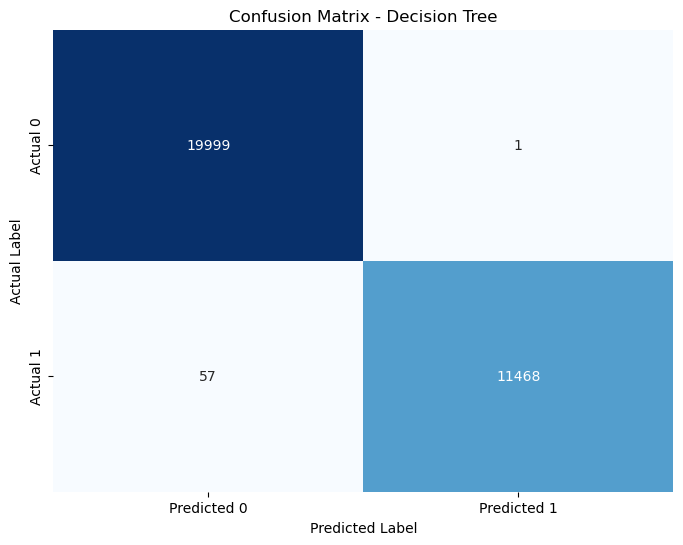

In [75]:

# Displaying the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bestdt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Decision Tree Evaluation Metrics (Best):

After testing, the maximum achievable accuracy by the Decision Tree model is 99.84%, which is slightly better than before tuning.

#### Conclusion:

Hyperparameters: {'criterion': 'entropy', 'max_depth': 8}. We achieved an accuracy of 99.8%. Here are the evaluation results of our Decision Tree model:

From the confusion matrix above, we can see that there are only 57 transactions that are actually money laundering but predicted as non-money laundering (FALSE NEGATIVE), and there are only 1 transactions that are actually not money laundering but predicted as money laundering (FALSE POSITIVE).

From these insights, we can observe other evaluation metrics such as precision, recall, and f1 score, which are nearly 100% (although rounded to 100% in the classification report above).







In [76]:
with open('modeldt_best.pkl','wb') as f:
    pkl.dump(modeldt_best,f)